# Import Required Libraries

In [50]:
# IMPORTING REQUIRD LIBRARIES
#pandas and numpy → handle data.
#matplotlib & seaborn → used for graphs/visual analysis.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [51]:
df=pd.read_csv(r"solarpowergeneration.csv")
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


# DATA INSPECTION

In [52]:
###Get the basic data information
print("DATASET SHAPE INFO :",df.shape)   #df.shape -> Shows dataset size
print("DATASET INFORMATION:\n",df.info)  #df.info()-> Shows structure + null count + column types
print("DATATYPES INFO:\n",df.dtypes)     #df.dtypes -> Confirms data types of each feature
print("No.of NULL VALUES:",df.isnull().sum())  #df.isnull().sum() -> Checks missing values
duplicates=df.duplicated().sum()    #df.duplicated().sum() -> Checks duplicate records



DATASET SHAPE INFO : (2920, 10)
DATASET INFORMATION:
 <bound method DataFrame.info of       distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity

# Missing Values Analysis

In [53]:
df.isnull().sum()


distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [54]:
# Handle missing value (only 1 missing)
df['average-wind-speed-(period)'].fillna(
    df['average-wind-speed-(period)'].median(),
    inplace=True
)


In [55]:
### Only one missing value was found and handled using median imputation to avoid skewness.

In [56]:
#Counts how many rows are duplicates.
#Displays them if found.

print("DETAILS OF THE DUPLICATE DATA:\n")
if duplicates>0:
  display(df[df.duplicated()])



DETAILS OF THE DUPLICATE DATA:



In [57]:
##No duplicate rows were found, ensuring data integrity.

# Explore Data Characteristics

In [58]:
##DATA STATS
#df.describe() shows the summary of numerical data in your dataset, including:
#count (how many values)
#mean (average)
#std (variation/spread)
#min & max (lowest and highest values)
#25%, 50%, 75% (distribution quartiles)
#It helps you quickly understand the range, spread, and central values of your data and detect outliers.

print("DATA STATISTICS\n",df.describe())

DATA STATISTICS
        distance-to-solar-noon  temperature  wind-direction   wind-speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       24.953425    10.096986   
std                  0.298024     6.841200        6.915178     4.838185   
min                  0.050401    42.000000        1.000000     1.100000   
25%                  0.243714    53.000000       25.000000     6.600000   
50%                  0.478957    59.000000       27.000000    10.000000   
75%                  0.739528    63.000000       29.000000    13.100000   
max                  1.141361    78.000000       36.000000    26.600000   

         sky-cover   visibility     humidity  average-wind-speed-(period)  \
count  2920.000000  2920.000000  2920.000000                  2920.000000   
mean      1.987671     9.557705    73.513699                    10.128767   
std       1.411978     1.383884    15.077139                     7.260333   

# Target Variable Analysis (Power Generated)

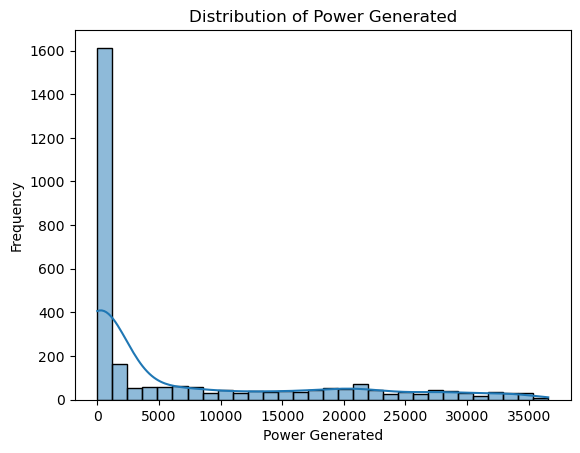

In [59]:
plt.figure()
sns.histplot(df['power-generated'], bins=30, kde=True)
plt.title("Distribution of Power Generated")
plt.xlabel("Power Generated")
plt.ylabel("Frequency")
plt.show()


In [60]:
##The target variable shows a right-skewed distribution, common in energy production data.

# Feature Distribution Analysis

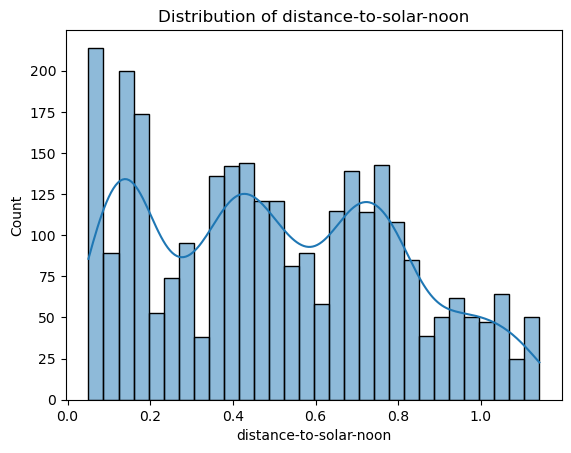

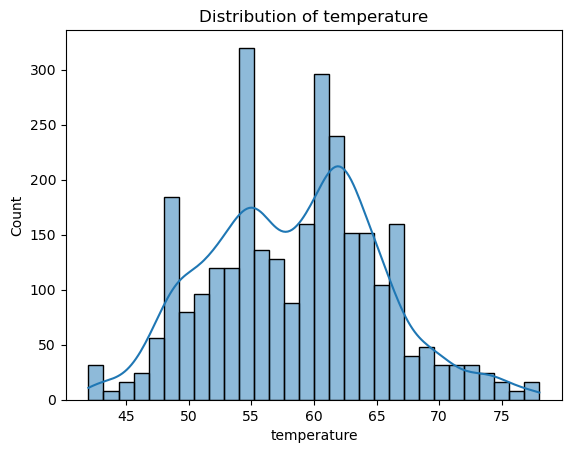

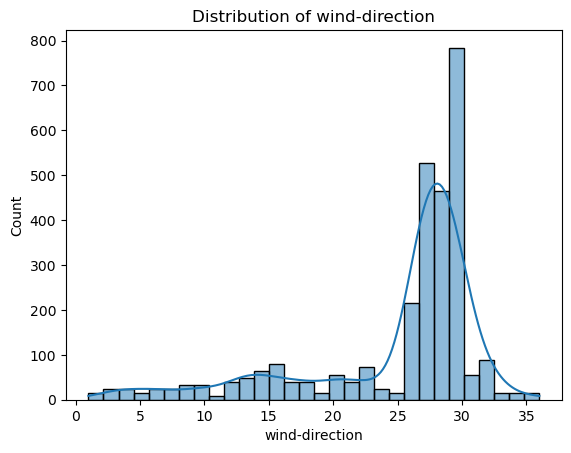

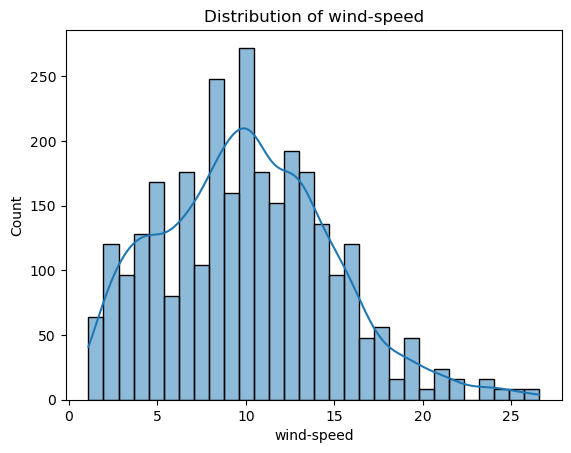

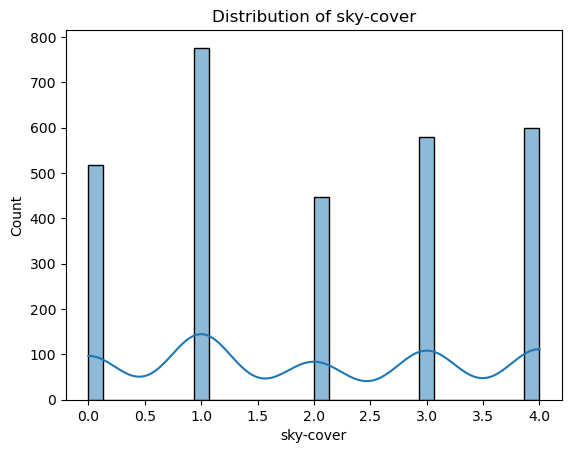

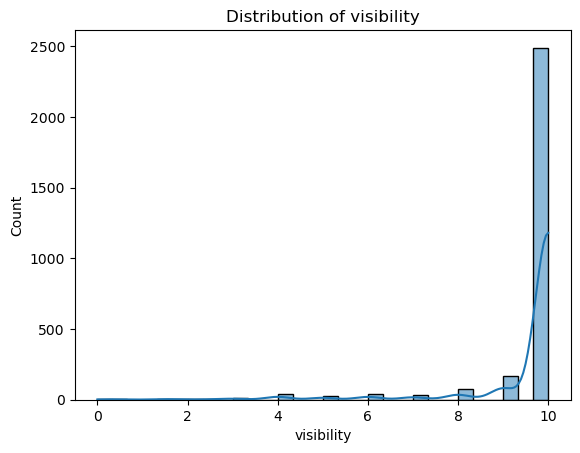

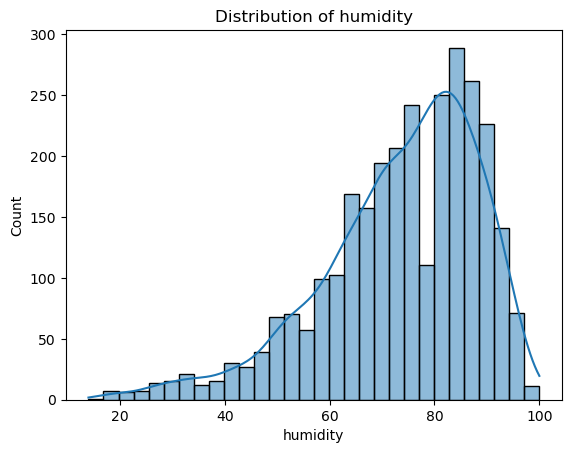

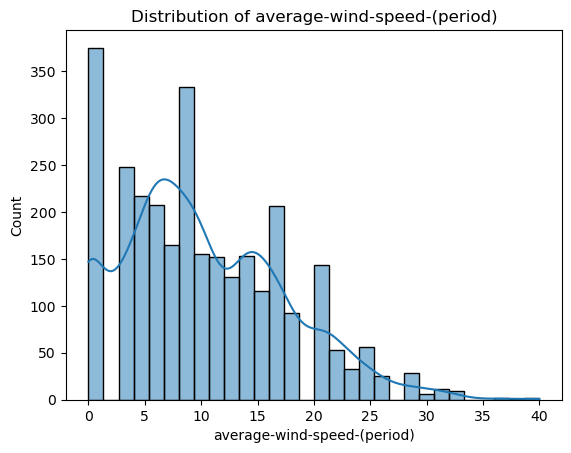

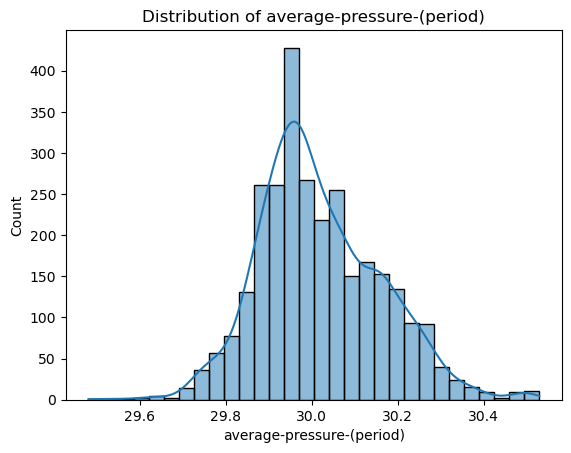

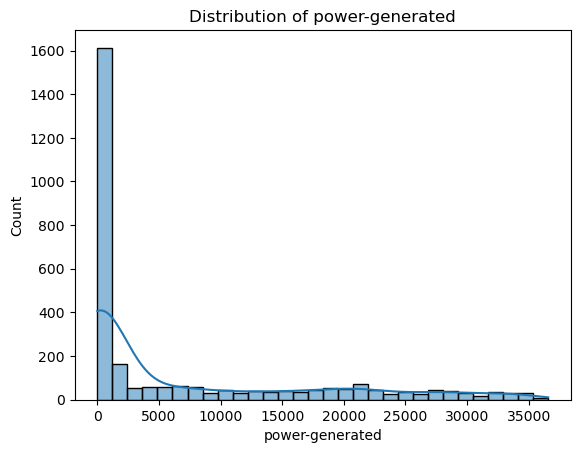

In [61]:
numerical_cols = df.columns

for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


# Outlier Detection (Before Handling)

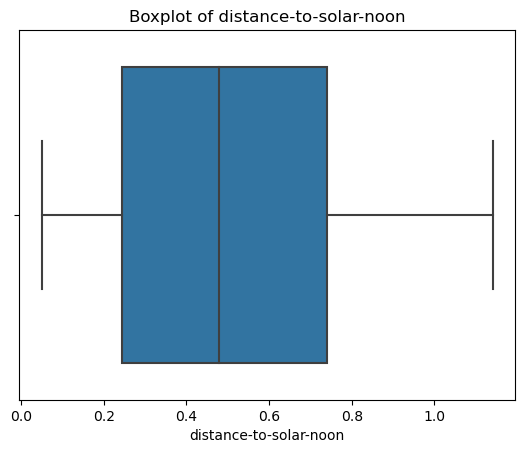

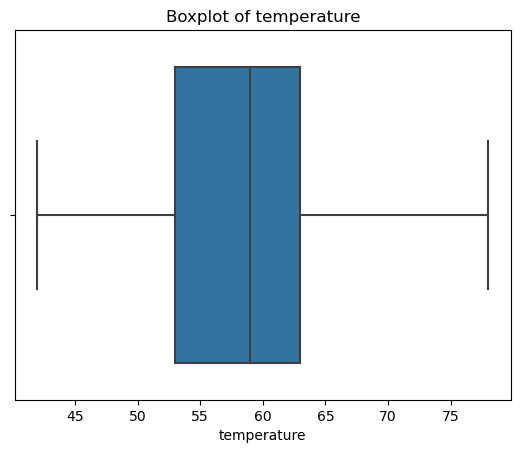

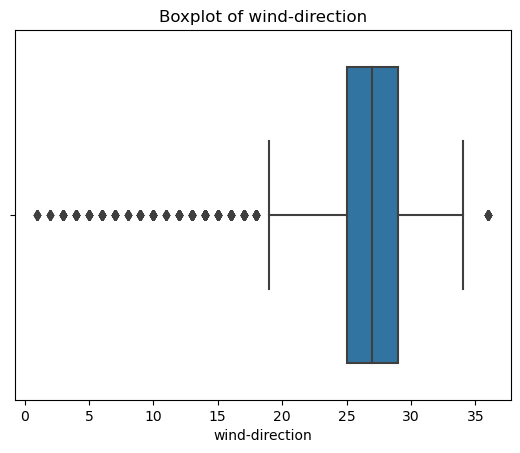

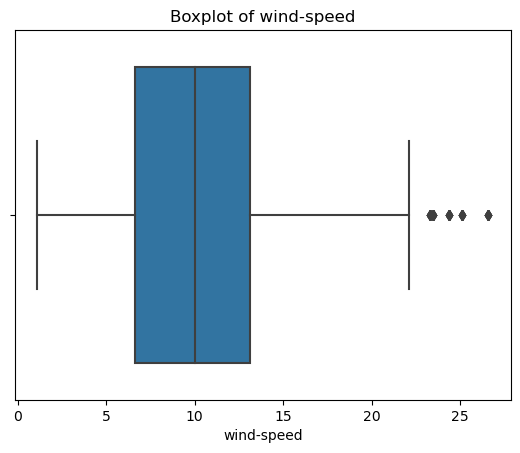

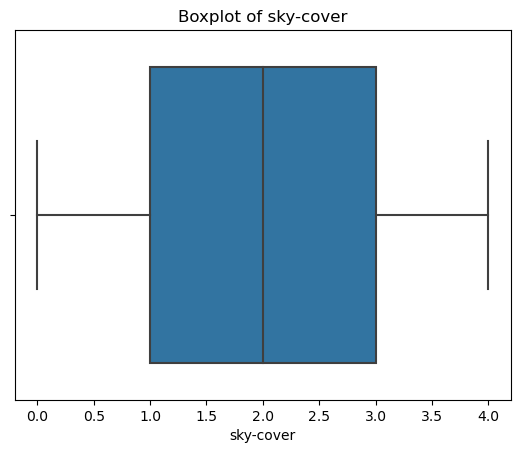

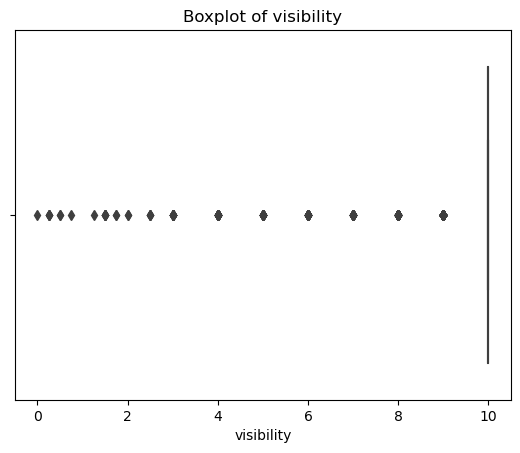

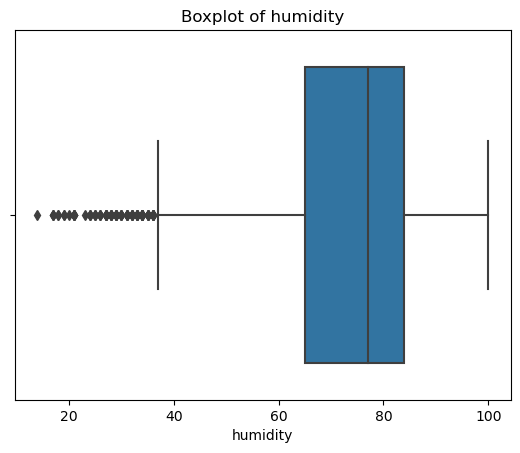

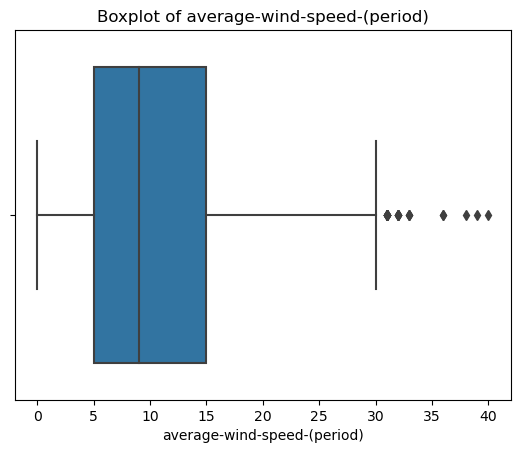

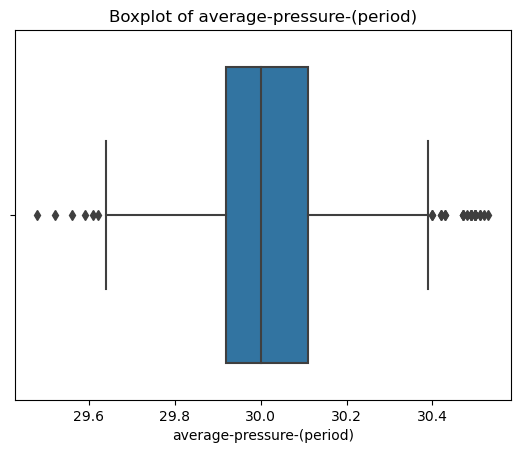

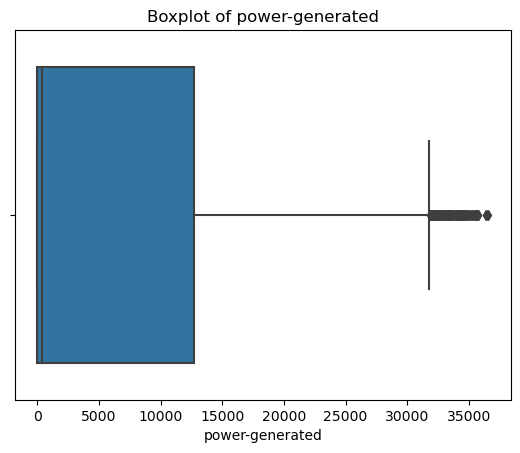

In [62]:
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [63]:
##Several meteorological features show outliers due to natural environmental variations.

In [64]:
##IQR-based capping reduced extreme values while preserving all observations.

# Correlation Analysis

In [65]:
import numpy as np

num_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[num_cols].corr(method='pearson')


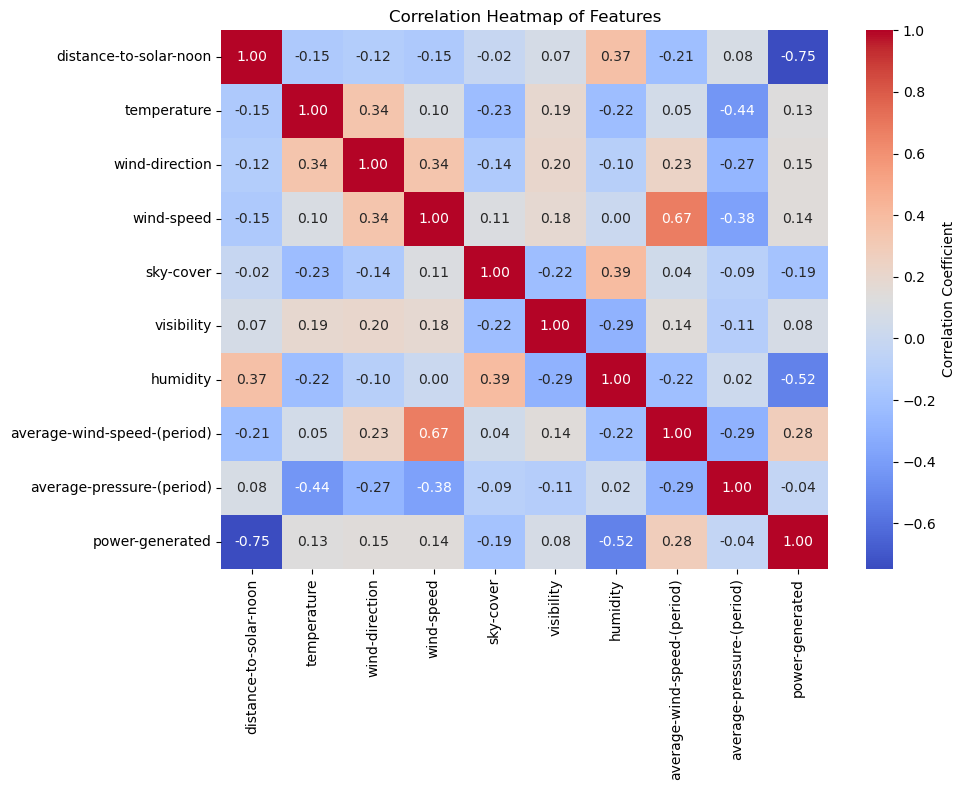

In [66]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()


In [67]:
##Distance to solar noon, temperature, and sky cover show significant correlation with power generation.

# Feature vs Target Relationship

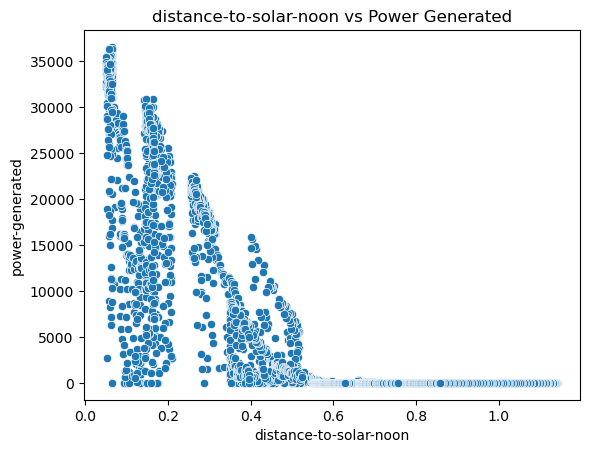

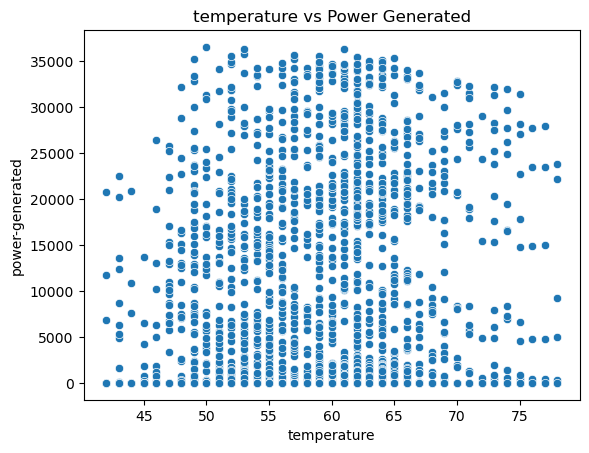

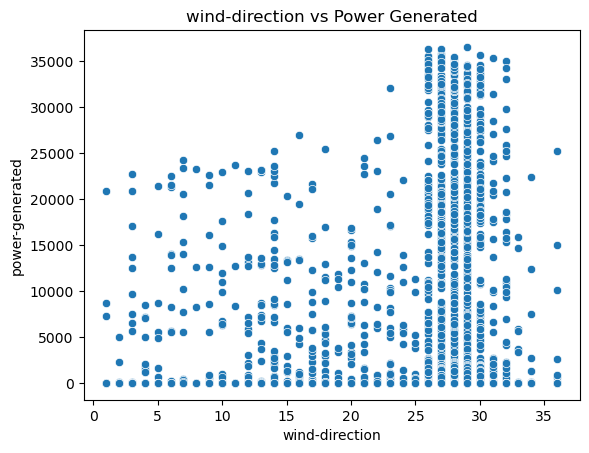

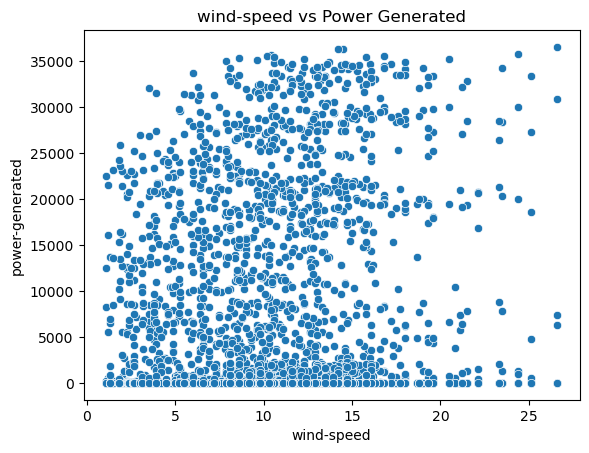

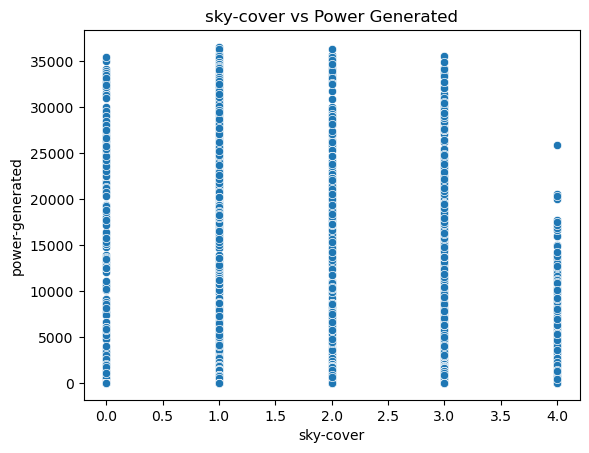

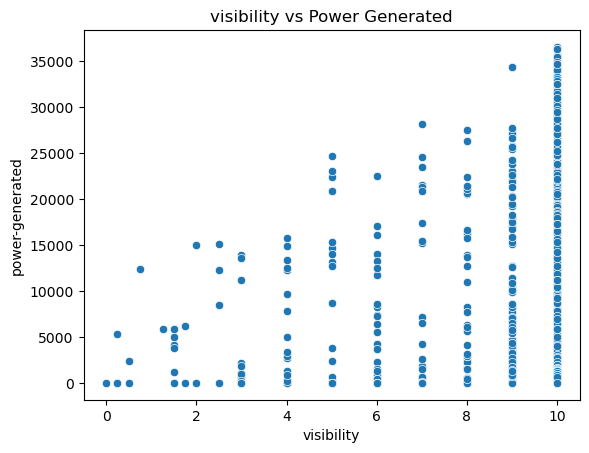

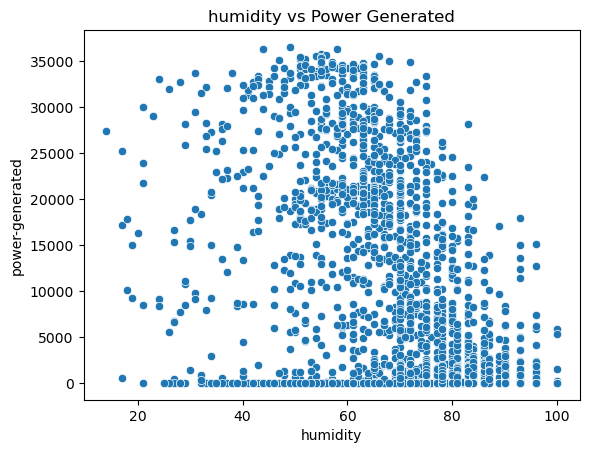

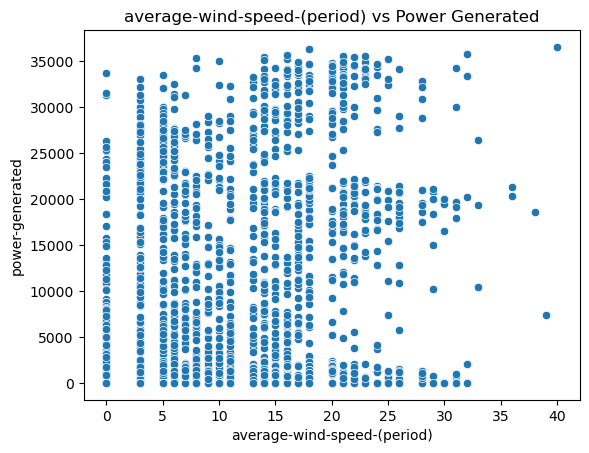

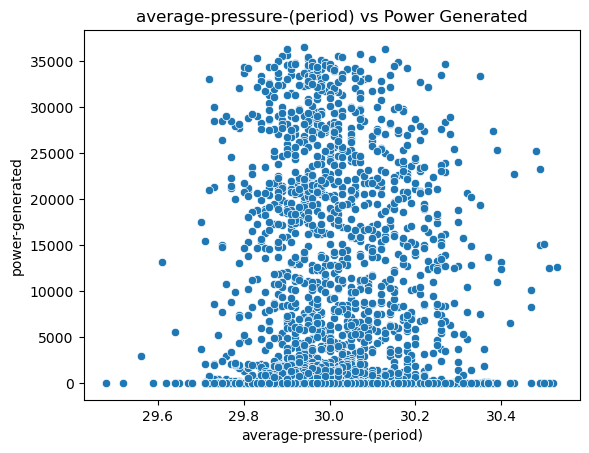

In [68]:
for col in df.columns[:-1]:
    plt.figure()
    sns.scatterplot(x=df[col], y=df['power-generated'])
    plt.title(f'{col} vs Power Generated')
    plt.show()


# Final Clean Dataset for Modeling

In [69]:
df_clean = df.copy()
df_clean.head()


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


### Feature selection using RFE  method

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [71]:
X = df_clean.drop('power-generated', axis=1)
y = df_clean['power-generated']

In [72]:
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
})

In [73]:
feature_ranking_sorted = feature_ranking.sort_values(by='Ranking')
feature_ranking_sorted

,Feature,Selected,Ranking
0,distance-to-solar-noon,True,1
4,sky-cover,True,1
5,visibility,True,1
7,average-wind-speed-(period),True,1
8,average-pressure-(period),True,1
6,humidity,False,2
1,temperature,False,3
2,wind-direction,False,4
3,wind-speed,False,5


### Top 5 features are:

1.distance-to-solar-noon 

2.average-wind-speed-(period)

3.humidity

4.sky-cover

5.average-pressure-(period)

## Model Building

In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [6]:
df = pd.read_csv("solarpowergeneration.csv")
df.head()


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [13]:

X = df.drop(columns=['power-generated'])
y = df['power-generated']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:

imputer = SimpleImputer(strategy="mean")

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [16]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}


In [12]:
results = []

for name, model in models.items():
    
    if name in ["Linear Regression", "Ridge Regression", "Lasso Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_imputed, y_train)
        y_pred = model.predict(X_test_imputed)
    
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df


,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,4981.202319,3.949518e+07,6284.519134,0.625059
1,Ridge Regression,4980.974164,3.949550e+07,6284.544594,0.625056
2,Lasso Regression,4981.203259,3.949518e+07,6284.518729,0.625059
3,Random Forest,1548.299058,1.161074e+07,3407.454241,0.889775
4,Gradient Boosting,1677.653644,1.042619e+07,3228.960394,0.901021


In [18]:
results_df_sorted = results_df.sort_values(by="R2 Score", ascending=False)
results_df_sorted


,Model,MAE,MSE,RMSE,R2 Score
4,Gradient Boosting,1677.653644,1.042619e+07,3228.960394,0.901021
3,Random Forest,1548.299058,1.161074e+07,3407.454241,0.889775
2,Lasso Regression,4981.203259,3.949518e+07,6284.518729,0.625059
0,Linear Regression,4981.202319,3.949518e+07,6284.519134,0.625059
1,Ridge Regression,4980.974164,3.949550e+07,6284.544594,0.625056


In [20]:
best_model = results_df_sorted.iloc[0]

print("BEST MODEL")
print("Model Name:", best_model["Model"])
print("R2 Score:", best_model["R2 Score"])
print("RMSE:", best_model["RMSE"])


BEST MODEL
Model Name: Gradient Boosting
R2 Score: 0.9010207787205786
RMSE: 3228.960394008769


In [21]:
imputer = SimpleImputer(strategy="mean")

X_train_imputed = imputer.fit_transform(X_train)


In [22]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)


In [23]:
best_model = GradientBoostingRegressor(random_state=42)

best_model.fit(X_train_imputed, y_train)


GradientBoostingRegressor(random_state=42)

In [25]:
import joblib


In [26]:
joblib.dump(best_model, "best_model.pkl")
joblib.dump(imputer, "imputer.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Files created successfully")


Files created successfully


In [27]:
import os
os.listdir()


['.anaconda',
 '.cache',
 '.conda',
 '.condarc',
 '.continuum',
 '.eclipse',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.Ld9VirtualBox',
 '.matplotlib',
 '.nbi',
 '.p2',
 '.PyCharmCE2019.1',
 '.spyder-py3',
 '.streamlit',
 '.vscode',
 '50_Startups_LR HW.ipynb',
 'anaconda3',
 'app.py.ipynb',
 'AppData',
 'Application Data',
 'Assignment 1.ipynb',
 'Assignment 2.ipynb',
 'Assignment 3-Basic of python .ipynb',
 'bank.ipynb',
 'Bankruptcy (2).xlsx',
 'Bankruptcy.xlsx',
 'bankruptcy_model.pkl.ipynb',
 'best_model.pkl',
 'Contacts',
 'Cookies',
 'data_scaler.pkl',
 'demo.py',
 'Desktop',
 'Documents',
 'Downloads',
 'eclipse',
 'eclipse-workspace',
 'EXPLORATORY DATA ANALYSIS ON A DATASET.ipynb',
 'Favorites',
 'imputer.pkl',
 'Jedi',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'n.java',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94e